<a href="https://colab.research.google.com/github/devashishbotre/BIB-Number-Extractor/blob/main/test_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
!pip install keras-ocr
!pip install --force-reinstall -v "tensorflow==2.15.1"

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Obtaining dependency information for tensorflow==2.15.1 from https://files.pythonhosted.org/packages/4f/42/433c0c64c5d3b8bee696cde2006d15f03f0504c2f746d49f38e32e52e239/tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 k

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import keras_ocr

In [ ]:
bibmodel=YOLO('/content/best.pt')
ocr_reader = easyocr.Reader(['en'], gpu=True)
# Initialize the OCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
bibarea=bibmodel('/content/BIB_Test_Image1.jpeg')
print(bibarea[0].boxes)


image 1/1 /content/BIB_Test_Image1.jpeg: 384x640 4 bib_numbers, 153.5ms
Speed: 3.9ms preprocess, 153.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 0.])
conf: tensor([0.8132, 0.3648, 0.3334, 0.2706])
data: tensor([[1.7436e+03, 6.1920e+02, 1.8641e+03, 6.9397e+02, 8.1317e-01, 0.0000e+00],
        [8.3733e+02, 5.9727e+02, 9.4563e+02, 6.6583e+02, 3.6475e-01, 0.0000e+00],
        [0.0000e+00, 7.8899e+02, 7.5853e+01, 1.2222e+03, 3.3336e-01, 0.0000e+00],
        [1.0780e+03, 5.8335e+02, 1.1921e+03, 6.6893e+02, 2.7059e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1418, 2520)
shape: torch.Size([4, 6])
xywh: tensor([[1803.8245,  656.5843,  120.5059,   74.7643],
        [ 891.4837,  631.5520,  108.3024,   68.5607],
        [  37.9267, 1005.5970,   75.8534,  433.2183],
        [1135.0386,  626.1382,  114.1183,   85.5844]])
xywhn: tensor([[0.7158, 0.4630, 0.0478, 0.0527],
        [0.

In [ ]:
import re
def detect_bib_numbers_with_ocr(image_path):
    # Load the trained YOLO model for inference
    bibarea = bibmodel(image_path)  # Run detection

    # Load image with OpenCV for visualization
    image = cv2.imread(image_path)

    for bbox in bibarea[0].boxes.data:  # Loop through detected objects
        x1, y1, x2, y2, conf, cls = bbox[:6]
        if int(cls) == 0:  # Check if it's the bib_number class
            processed_crop = image[int(y1):int(y2), int(x1):int(x2)]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  # Crop the bib region
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            #processed_crop = preprocess_image(bib_crop)
            numberarea=numbermodel(processed_crop)  # Format: [x1, y1, x2, y2, confidence, class_id]
            cv2_imshow(processed_crop)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            digits = []
            ocr_result = ocr_reader.readtext(processed_crop)
            a=keras_ocr.tools.read(processed_crop)
            # Perform OCR
            prediction_groups = pipeline.recognize([image])

# Output format: [(bbox, text), ...]
            for bbox,text in prediction_groups[0]:
                print(text)


    # Display the image with bib number detections
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


image 1/1 /content/BIB_Test_Image1.jpeg: 384x640 4 bib_numbers, 202.1ms
Speed: 5.6ms preprocess, 202.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 416x640 (no detections), 253.1ms
Speed: 3.3ms preprocess, 253.1ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)


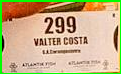

1/1 [==============================] - 1s 1s/step
299

0: 416x640 (no detections), 155.0ms
Speed: 3.2ms preprocess, 155.0ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)


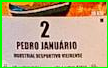

1/1 [==============================] - 1s 743ms/step
2

0: 640x128 (no detections), 67.5ms
Speed: 1.8ms preprocess, 67.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 128)


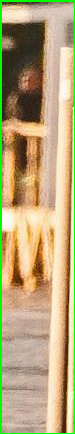

1/1 [==============================] - 2s 2s/step

0: 480x640 (no detections), 177.0ms
Speed: 6.1ms preprocess, 177.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


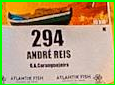

1/1 [==============================] - 1s 740ms/step
294


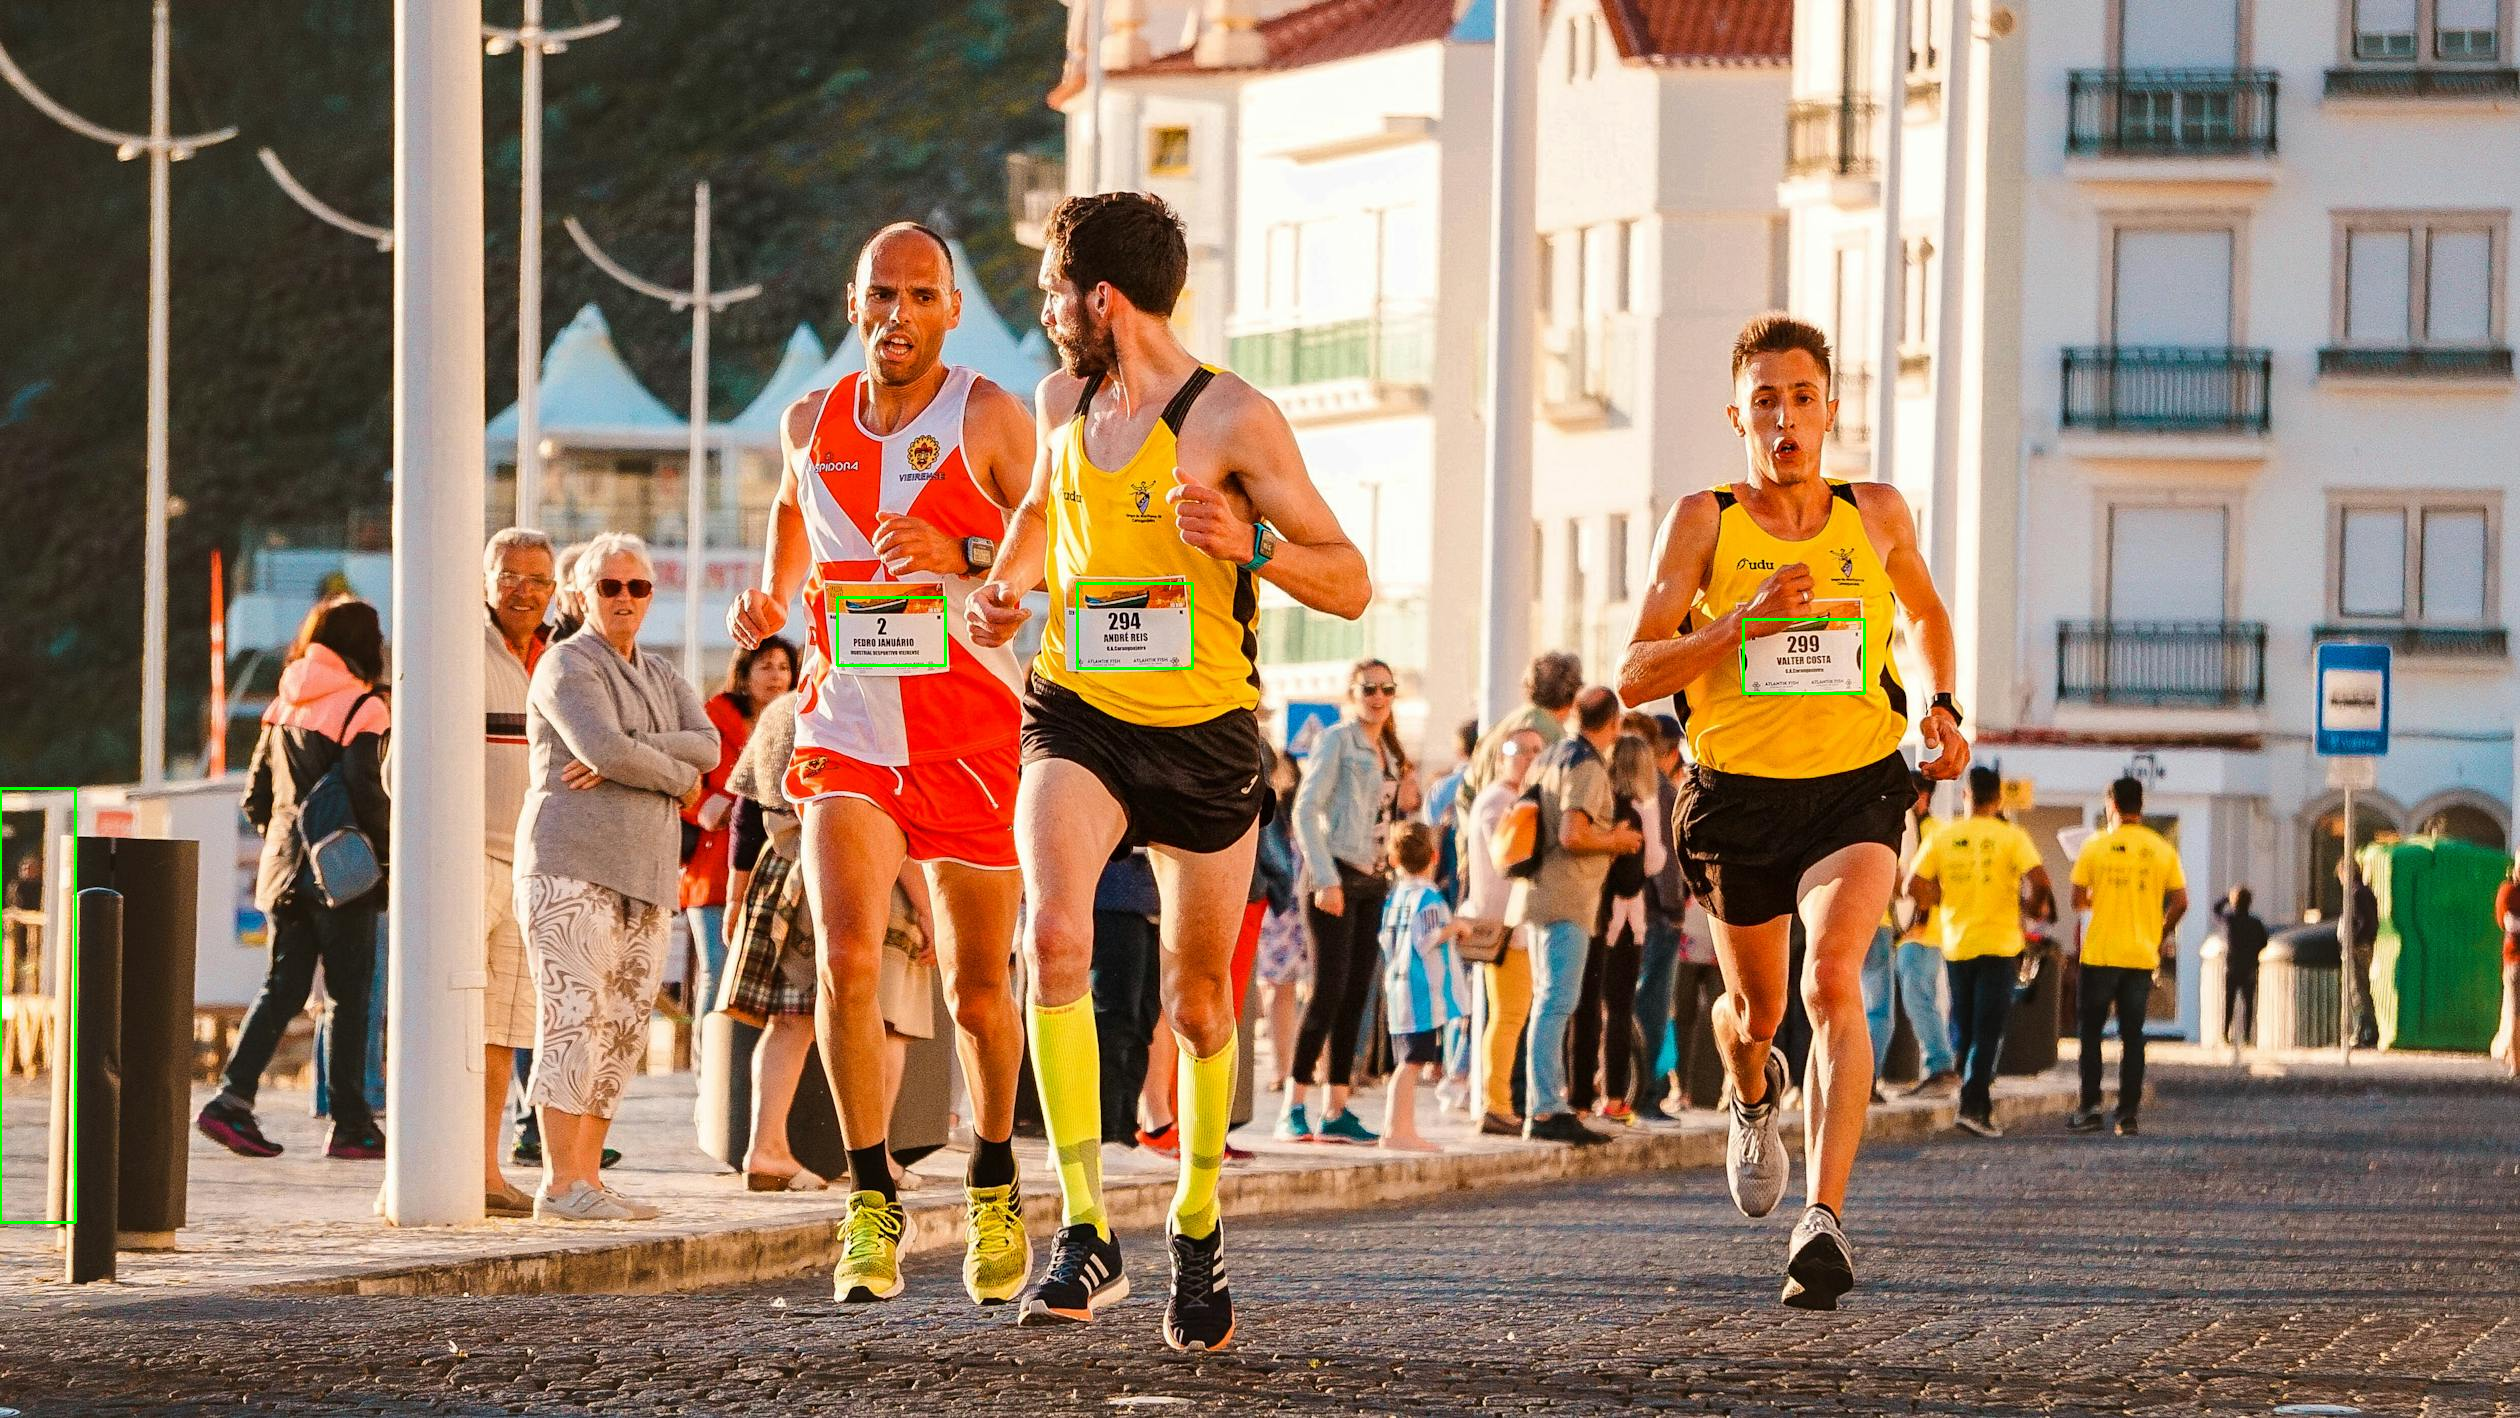

In [ ]:
detect_bib_numbers_with_ocr('/content/BIB_Test_Image1.jpeg')